## 1.Importing Needed libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## 2.Calling the path of data

In [3]:
lol_data = ("games.csv")

## 2.Wrangling Function for data

In [4]:
def wrangle(lol_path):
    # Calling data
    lol = pd.read_csv(lol_path)
    # Simple look at data
    print(lol.head())
    # Simple Info of data
    print(lol.info())
    # Null values?
    print(lol.describe())
    # Getting only needed columns, which will help in classification problem
    League_Data=lol[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills']]
    print("Checking any irrelevant in data ✅")
    print("Info of data ✅")
    print("Retrieving only needed columns from data ✅")
    return League_Data
    

In [5]:
lol = wrangle(lol_path=lol_data)

       gameId  creationTime  gameDuration  seasonId  winner  firstBlood  \
0  3326086514  1.504280e+12          1949         9       1           2   
1  3229566029  1.497850e+12          1851         9       1           1   
2  3327363504  1.504360e+12          1493         9       1           2   
3  3326856598  1.504350e+12          1758         9       1           1   
4  3330080762  1.504550e+12          2094         9       1           2   

   firstTower  firstInhibitor  firstBaron  firstDragon  ...  t2_towerKills  \
0           1               1           1            1  ...              5   
1           1               1           0            1  ...              2   
2           1               1           1            2  ...              2   
3           1               1           1            1  ...              0   
4           1               1           1            1  ...              3   

   t2_inhibitorKills  t2_baronKills  t2_dragonKills  t2_riftHeraldKills  \
0    

## 3.Some EDA for data
### League has 2 side, top right and bottom left, and the blue team is in the side of bottom left, while red team are at top right of the map 

In [6]:
# Assigning each team in variable
first_team = lol[lol.winner==1] 
second_team = lol[lol.winner==2]

In [7]:
# Calculate the number of wins for each team and first blood combination
win_counts = lol.groupby(["winner", "firstBlood"]).size().reset_index(name="count")
# Calculate the total number of wins for each team
team_1_wins = win_counts[win_counts["winner"] == 1]["count"].sum()
team_2_wins = win_counts[win_counts["winner"] == 2]["count"].sum()
# Calculate the proportions of wins for team 1 when they had first blood, opponent had first blood, or in rematches
team_1_win_first_blood_for_team_1 = win_counts[(win_counts["winner"] == 1) & (win_counts["firstBlood"] == 1)]["count"].values[0] / team_1_wins
team_1_win_first_blood_for_team_2 = win_counts[(win_counts["winner"] == 1) & (win_counts["firstBlood"] == 2)]["count"].values[0] / team_1_wins
team_1_win_first_blood_for_remake = win_counts[(win_counts["winner"] == 1) & (win_counts["firstBlood"] == 0)]["count"].values[0] / team_1_wins
# Calculate the proportions of wins for team 2 when they had first blood, opponent had first blood, or in rematches
team_2_win_first_blood_for_team_1 = win_counts[(win_counts["winner"] == 2) & (win_counts["firstBlood"] == 1)]["count"].values[0] / team_2_wins
team_2_win_first_blood_for_team_2 = win_counts[(win_counts["winner"] == 2) & (win_counts["firstBlood"] == 2)]["count"].values[0] / team_2_wins
team_2_win_first_blood_for_remake = win_counts[(win_counts["winner"] == 2) & (win_counts["firstBlood"] == 0)]["count"].values[0] / team_2_wins
# Print the results
print(f"Proportion of wins for team 1 when they had the first blood: {team_1_win_first_blood_for_team_1:.1%}"
,f"Proportion of wins for team 1 when the opponent had the first blood: {team_1_win_first_blood_for_team_2:.1%}"
,f"Proportion of wins for team 1 in rematches: {team_1_win_first_blood_for_remake:.1%}",sep='\n')
print(f"Proportion of wins for team 2 when they had the first blood: {team_2_win_first_blood_for_team_1:.1%}"
,f"Proportion of wins for team 2 when the opponent had the first blood: {team_2_win_first_blood_for_team_2:.1%}"
,f"Proportion of wins for team 2 in rematches: {team_2_win_first_blood_for_remake:.1%}",sep='\n')

Proportion of wins for team 1 when they had the first blood: 59.6%
Proportion of wins for team 1 when the opponent had the first blood: 39.3%
Proportion of wins for team 1 in rematches: 1.1%
Proportion of wins for team 2 when they had the first blood: 41.6%
Proportion of wins for team 2 when the opponent had the first blood: 57.4%
Proportion of wins for team 2 in rematches: 1.0%


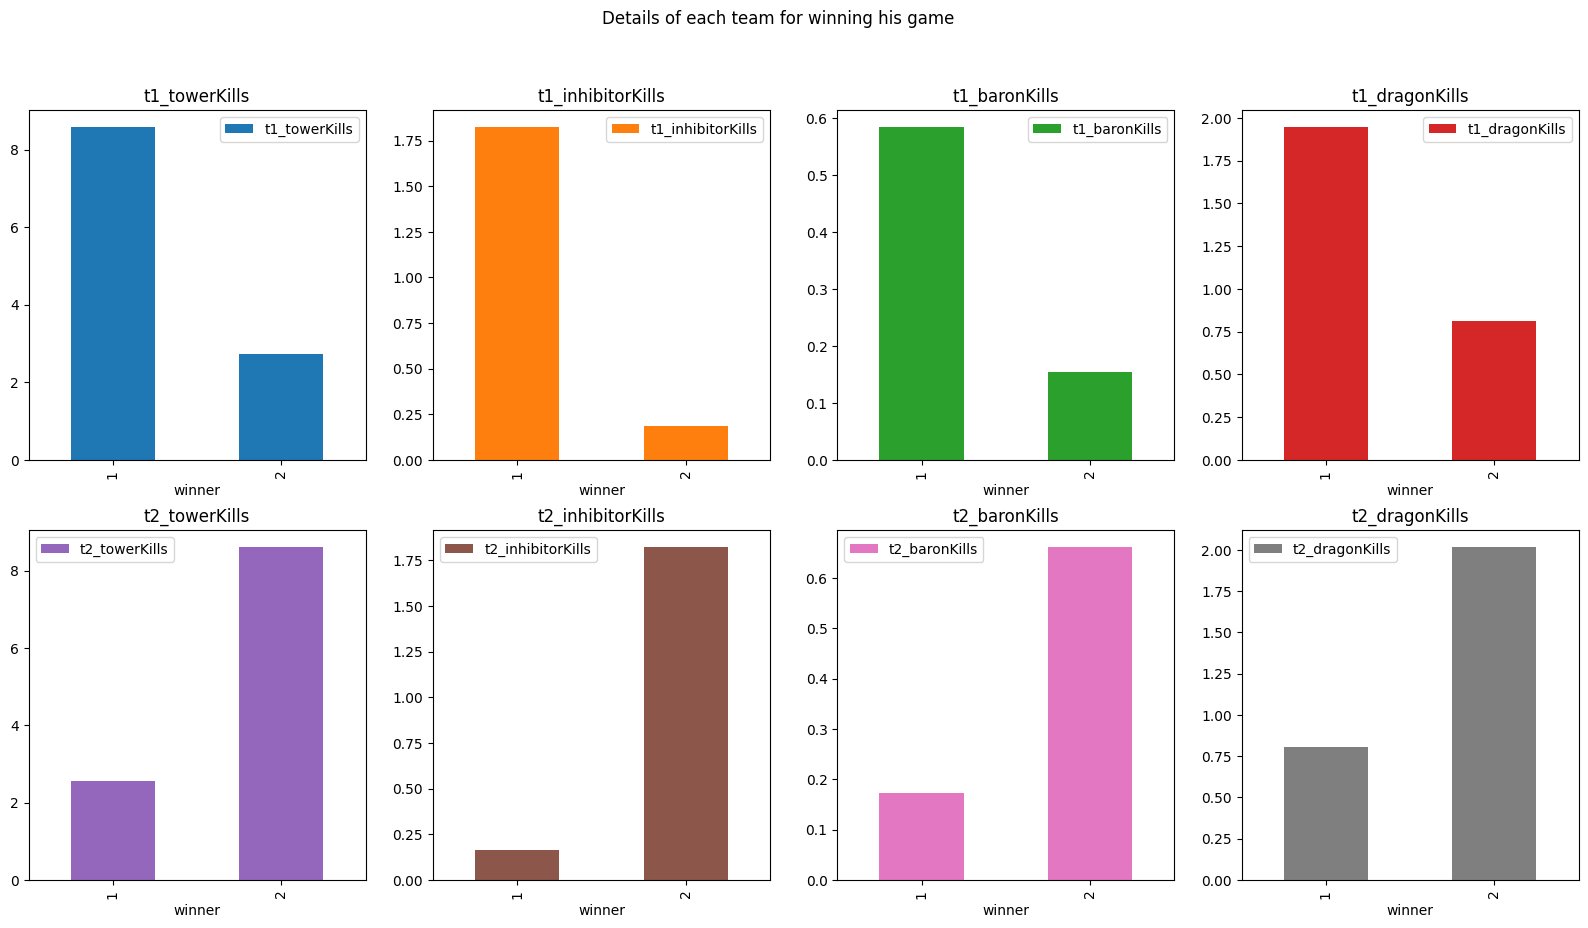

In [8]:
Towers_Barons_Drakes_Inhib=lol[["winner","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills"]]
Towers_Barons_Drakes_Inhib.groupby("winner").mean()
Towers_Barons_Drakes_Inhib.groupby("winner").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(20,10),layout=(2,4),title="Details of each team for winning his game")
plt.show()

## 4.Building our model
### it's based on classifcation problem, so let's try Tree and Random forest!

In [9]:
features = lol.drop(columns=['winner'])
target = lol['winner']

In [10]:
sd = StandardScaler()
features = sd.fit_transform(features)
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep="\n")
X_train

(41192, 14)
(10298, 14)
(41192,)
(10298,)


array([[ 1.01611295,  1.0120213 ,  1.02281125, ...,  1.60388445,
         0.9538764 ,  1.30310827],
       [ 1.01611295,  1.0120213 ,  1.02281125, ...,  0.80787865,
        -0.67541854,  0.48643517],
       [ 1.01611295, -0.83013151, -1.93537283, ..., -0.78413297,
        -0.67541854, -1.14691102],
       ...,
       [ 1.01611295, -0.83013151,  1.02281125, ...,  0.80787865,
        -0.67541854,  1.30310827],
       [ 1.01611295,  1.0120213 , -0.45628079, ..., -0.78413297,
        -0.67541854, -1.14691102],
       [-0.90577868,  1.0120213 ,  1.02281125, ...,  2.39989026,
         0.9538764 ,  0.48643517]])

In [11]:
def model_creation(X_train, y_train):
    # Define hyperparameters grid for DecisionTreeClassifier
    tree_param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'splitter': ['best', 'random']  
    }
    # Create a DecisionTreeClassifier
    tree_classifier = DecisionTreeClassifier(random_state=100)
    # Perform grid search with cross-validation for DecisionTreeClassifier
    tree_grid_search = GridSearchCV(tree_classifier, tree_param_grid, cv=5)
    tree_grid_search.fit(X_train, y_train)
    # Print the best hyperparameters for the DecisionTreeClassifier
    print("Best hyperparameters for DecisionTreeClassifier:")
    print(tree_grid_search.best_params_)
    # Define hyperparameters grid for RandomForestClassifier
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30]
    }
    # Create a RandomForestClassifier
    rf_classifier = RandomForestClassifier(random_state=100)
    # Perform grid search with cross-validation for RandomForestClassifier
    rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
    rf_grid_search.fit(X_train, y_train)
    # Print the best hyperparameters for the RandomForestClassifier
    print("Best hyperparameters for RandomForestClassifier:")
    print(rf_grid_search.best_params_)
    
    # Return the best models
    best_tree_model = tree_grid_search.best_estimator_
    best_rf_model = rf_grid_search.best_estimator_

    return best_tree_model, best_rf_model


In [12]:
# Let's run it!
best_tree_model, best_rf_model = model_creation(X_train, y_train)

Best hyperparameters for DecisionTreeClassifier:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best hyperparameters for RandomForestClassifier:
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}


In [13]:
# print scores 
print(f"Tree model has Achieved about : {best_tree_model.score(X_train,y_train):.2%}",
      f"Random Forest model has Achieved about : {best_rf_model.score(X_train,y_train):.2%}",sep="\n")

Tree model has Achieved about : 97.38%
Random Forest model has Achieved about : 97.82%


In [14]:
# Testing score on Tree
y_pred_tree = best_tree_model.predict(X_test)
score_of_tree = accuracy_score(y_test,y_pred_tree)
# Testing score on random forest
y_pred_forest = best_rf_model.predict(X_test)
score_of_forest = accuracy_score(y_test,y_pred_forest)
print(f"Test score at Tree = {score_of_tree:.2%}",f"Test score at forest = {score_of_forest:.2%}",sep='\n')

Test score at Tree = 96.73%
Test score at forest = 97.02%


## They are equal as well! no one better than other, but may that forest kinda better and acceptable

##### Let's try simple game, ok ? 
The first team secured the First Blood, First Tower, First Baron, First Dragon, and First Rift Herald, while the second team managed to claim only the First Inhibitor.

Team 1 achieved 12 tower takedowns, 3 inhibitor takedowns, 2 Baron kills, and 5 dragon kills.

On the other hand, Team 2 earned 9 tower takedowns, 3 inhibitor takedowns, 2 Baron kills, and 2 dragon kills.

In [15]:
game={
    "feature":["first_blood","first_tower","first_inhibitor","first_Baron","first_Dragon","first_RiftHerald",
"t1_tower","t1_inhibitor","t1_baron","t1_dragon","t2_tower","t2_inhibitor","t2_baron","t2_dragon"],
         "value":[1,1,2,1,1,1,12,3,2,5,9,3,2,2]}
game_frame=pd.DataFrame(game).T
game_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
feature,first_blood,first_tower,first_inhibitor,first_Baron,first_Dragon,first_RiftHerald,t1_tower,t1_inhibitor,t1_baron,t1_dragon,t2_tower,t2_inhibitor,t2_baron,t2_dragon
value,1,1,2,1,1,1,12,3,2,5,9,3,2,2


In [16]:
results_of_game = game_frame.loc['value'].values.reshape(1, -1)
print("Using Tree:")
print("The Winner team will be:",best_tree_model.predict(results_of_game))
print(f"The Percent of team 1 to win was :{best_tree_model.predict_proba(results_of_game)[0][0]:.0%}, while team number 2 was :{best_tree_model.predict_proba(results_of_game)[0][1]:.0%}")
print("Using RandomForest:")
print("The Winner team will be:",best_rf_model.predict(results_of_game))
print(f"The Percent of team 1 to win was :{best_rf_model.predict_proba(results_of_game)[0][0]:.0%}, while team number 2 was :{best_rf_model.predict_proba(results_of_game)[0][1]:.0%}")

Using Tree:
The Winner team will be: [1]
The Percent of team 1 to win was :100%, while team number 2 was :0%
Using RandomForest:
The Winner team will be: [1]
The Percent of team 1 to win was :66%, while team number 2 was :34%


In [17]:
import pickle

# Open the pickle file for reading (rb stands for "read binary")
with open("tree.pkl", "wb") as file:
    # Load the data from the pickle file
    loaded_data = pickle.dump(best_tree_model,file)

# Open the pickle file for reading (rb stands for "read binary")
with open("rf.pkl", "wb") as file:
    # Load the data from the pickle file
    loaded_data = pickle.dump(best_rf_model,file)


print("Done Tree model and rf")


Done Tree model and rf
